In [ ]:
import cv2
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
import glob
file =  pathlib.Path("/content/drive/My Drive/team")

In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255] = 255
    hsv[:,:,2] = hsv[:,:,2]*value
    hsv[:,:,2][hsv[:,:,2]>255]= 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img
    #AUGUMENTATION

In [ ]:
resultant = '/content/augumentedimages'

In [ ]:
items=os.listdir(file)
classes=[]
count=0
images=[]
labels=[]
for i in items:
    i1=0
    print(i)
    classes.append(i)
    path1=f"{file}/{i}"
    a=random.randint(5,10)
    img=cv2.imread(path1)
    img=cv2.resize(img,(224,224))
    k=i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)

    i1+=1
    while a!=0:
      img=cv2.rotate(img,lt[random.randint(0,2)])
      images.append(img)
      cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
      i1+=1
      labels.append(count)
      if a%2==0:
        img = brightness(img)
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.jpeg",img)
        i1+=1
        labels.append(count)
      a-=1
    count+=1
images=np.array(images)
labels=np.array(labels)

dhoni.jpg
Rohit.jpg
hardik.jpeg


In [ ]:
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import *
from keras.applications.vgg16 import VGG16,preprocess_input

In [ ]:
model=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
for i in model.layers:
  i.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
transferresnet=Sequential()
#adding pretrained model
transferresnet.add(model)
#adding customer layers
transferresnet.add(GlobalAveragePooling2D())
transferresnet.add(Dense(512,activation="relu"))
transferresnet.add(Dense(128,activation="relu"))
transferresnet.add(Dense(15,activation="softmax"))

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get('accuracy')>.99):
      print("\nReached %2.2f%% accuracy, so stopping training"%(99))
      self.model.stop_training=True
callbacks=myCallback()

CONVOLUTIONAL NEURAL NETWORKS


In [ ]:
transferresnet.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferresnet.fit(images,labels,epochs=10,callbacks=[callbacks])

Epoch 1/10
2/2 [==============================] - 23s 2s/step - loss: 0.4995 - accuracy: 0.8824
Epoch 2/10
2/2 [==============================] - 23s 2s/step - loss: 0.2122 - accuracy: 0.9706
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 0.0346 - accuracy: 1.0000 call

Reached 99.00% accuracy, so stopping training
2/2 [==============================] - 23s 2s/step - loss: 0.0346 - accuracy: 1.0000


In [ ]:
def predict(i,transferVGG,labels):
  path1=f"{file}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferVGG.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)

In [ ]:
print(classes)

['dhoni.jpg', 'Rohit.jpg', 'hardik.jpeg']


1/1 [==============================] - 1s 1s/step


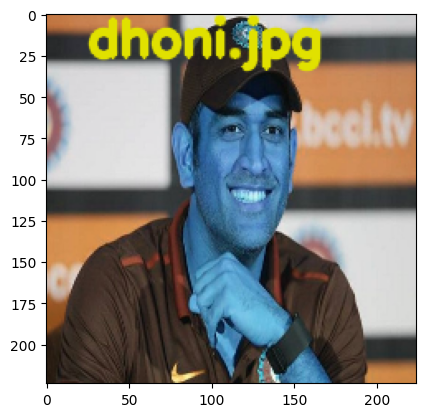

In [ ]:
predict('dhoni.jpg',transferresnet,classes)

1/1 [==============================] - 1s 1s/step


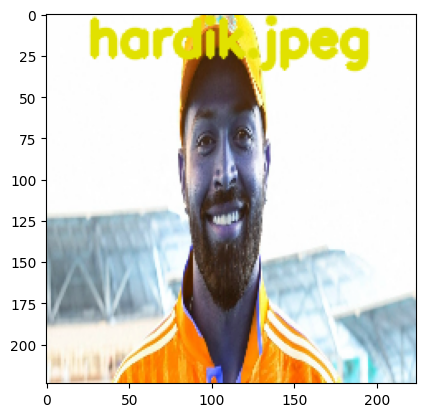

In [ ]:
predict('hardik.jpeg',transferresnet,classes)